In [1]:
import numpy as np
import csv
import pandas as pd
import seaborn as sns

In [2]:
words4cat = {
    'A': ['rud', 'hep', 'bif', 'mib'],
    'C': ['lam', 'neb', 'szig', 'kav'],
    'D': ['gal', 'lor'],
    'F': ['tez', 'dők', 'rász', 'dup'],
    'G': ['vot', 'péf']
}

cat4word = {}
for c, w in words4cat.items():
    for word in w:
        cat4word[word] = c

cats = list(words4cat.keys())
words = list(cat4word.keys())

In [3]:
def get_pair_occurrences(data):
    res_dict = {}

    for row in data:
        for (i, j) in zip(row, row[1:]):
            if (i, j) in res_dict:
                res_dict[(i, j)] += 1
            else:
                res_dict[(i, j)] = 1

    return res_dict

In [4]:
def get_tp(matrix, word1, word2):
    return matrix[words.index(word1)][words.index(word2)]

In [5]:
def get_cat_tp(matrix, word1, word2):
    return matrix[cats.index(cat4word[word1])][cats.index(cat4word[word2])]

In [6]:
def read_data(filename):
    data = []

    with open(filename) as csvfile:
        readCsv = csv.reader(csvfile, delimiter=',')
        for row in readCsv:
            while '0' in row:
                row.remove('0')
            while '' in row:
                row.remove('')
            data.append(row)

    return data

In [7]:
to_read = ['online_training.csv']

data_training = []

for filename in to_read:
    data_training.append(read_data(filename))

data_training = sum(data_training, [])

training_occ = get_pair_occurrences(data_training)

,rud,hep,bif,mib,lam,neb,szig,kav,gal,lor,tez,dők,rász,dup,vot,péf
rud,0.00,0.00,0.00,0.00,0.09,0.07,0.10,0.06,0.23,0.17,0.00,0.00,0.00,0.00,0.00,0.00
hep,0.00,0.00,0.00,0.00,0.09,0.07,0.03,0.09,0.23,0.27,0.00,0.00,0.00,0.00,0.00,0.00
bif,0.00,0.00,0.00,0.00,0.09,0.07,0.08,0.04,0.27,0.27,0.00,0.00,0.00,0.00,0.00,0.00
mib,0.00,0.00,0.00,0.00,0.09,0.07,0.11,0.06,0.27,0.30,0.00,0.00,0.00,0.00,0.00,0.00
lam,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.12,0.07,0.14,0.20,0.14
neb,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.15,0.13,0.07,0.28,0.16
szig,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.12,0.17,0.14,0.24,0.44
kav,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.18,0.07,0.10,0.28,0.26
gal,0.00,0.00,0.00,0.00,0.13,0.13,0.18,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lor,0.00,0.00,0.00,0.00,0.16,0.13,0.19,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
tez,0.00,0.00,0.00,0.00,0.02,0.07,0.10,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
dők,0.00

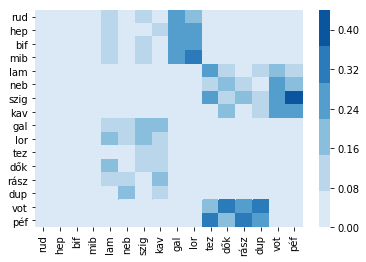

In [9]:
n = len(words)
M_words = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if (words[i], words[j]) in training_occ:
            M_words[i, j] = training_occ[(words[i], words[j])]

for j in range(n):
    s = sum(M_words[:, j])
    if s > 0:
        M_words[:, j] = [x/s for x in M_words[:, j]]

df = pd.DataFrame(M_words, index=words, columns=words)
sns.heatmap(df, cmap=sns.color_palette('Blues'))

file = open('output_word.csv', 'w')
line = ',' + ','.join(words)
file.write(line + '\n')
print(line)
for i in range(len(M_words)):
    line = words[i] + ',' + ','.join('%.2f' % number for number in M_words[i])
    file.write(line + '\n')
    print(line)
file.close()

,A,C,D,F,G
A,0.00,0.67,0.33,0.00,0.00
C,0.00,0.00,0.00,0.65,0.35
D,0.00,1.00,0.00,0.00,0.00
F,0.00,1.00,0.00,0.00,0.00
G,0.00,0.00,0.00,1.00,0.00


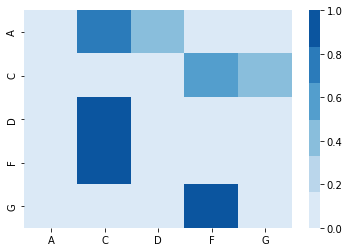

In [10]:
n = len(cats)
M_cat = [[0]*n for _ in range(n)]

for pair, occ in training_occ.items():
    if pair[0] in cat4word and pair[1] in cat4word:
        cat0 = cat4word[pair[0]]
        cat1 = cat4word[pair[1]]
        M_cat[cats.index(cat0)][cats.index(cat1)] += 1

for row in M_cat:
    s = sum(row)
    if s > 0:
        row[:] = [x/s for x in row]

df = pd.DataFrame(M_cat, index=cats, columns=cats)
sns.heatmap(df, cmap=sns.color_palette('Blues'))

file = open('output_training_categories_tp.csv', 'w')
line = ',' + ','.join(cats)
file.write(line + '\n')
print(line)
for i in range(len(M_cat)):
    line = cats[i] + ',' + ','.join('%.2f' % number for number in M_cat[i])
    file.write(line + '\n')
    print(line)
file.close()

In [11]:
to_read = ['online_recovery.csv']

data_test = []

for filename in to_read:
    data_test.append(read_data(filename))

data_test = sum(data_test, [])

In [12]:
width = max(map(lambda x: len(x), data_test)) - 1
height = len(data_test)
M_words_comp = [[-1]*width for _ in range(height)]

for i in range(len(data_test)):
    row = data_test[i]
    for j in range(len(row) - 1):
        M_words_comp[i][j] = get_tp(M_words, row[j], row[j+1])

file = open('output_test_word_tp.csv', 'w')
for row in M_words_comp:
    numbers = list(filter(lambda x: x >= 0, row))
    line = ','.join('%.2f' % number for number in row).replace('-1.00', '') + ',' + '%.2f' % (sum(numbers) / len(numbers))
    file.write(line + '\n')
    print(line)
file.close()

0.17,0.16,0.22,0.07,,,0.15
0.23,0.13,0.20,0.29,0.13,0.28,0.21
0.07,0.16,0.24,,,,0.16
0.17,0.19,0.24,0.29,,,0.22
0.09,0.07,0.15,0.26,,,0.14
0.23,0.15,0.28,0.31,0.06,,0.21
0.07,0.16,0.15,0.16,,,0.13
0.07,0.16,0.15,0.13,0.26,,0.15
0.27,0.19,0.24,0.31,0.22,0.16,0.23
0.11,0.12,,,,,0.12
0.07,0.13,0.13,0.14,,,0.12
0.08,0.44,0.33,0.13,0.28,,0.25
0.04,0.00,0.02,,,,0.02
0.23,0.13,0.07,,,,0.14
0.17,0.16,0.07,,,,0.13
0.09,0.14,0.24,0.13,,,0.15
0.27,0.18,0.17,0.13,0.20,,0.19
0.23,0.15,0.26,0.33,0.03,,0.20
0.27,0.18,0.22,0.10,,,0.19
0.08,0.22,,,,,0.15
0.30,0.13,0.07,0.13,0.28,,0.18
0.10,0.22,0.07,,,,0.13
0.27,0.11,0.26,0.30,,,0.23
0.04,0.26,0.24,,,,0.18


In [13]:
width = max(map(lambda x: len(x), data_test)) - 1
height = len(data_test)
M_cats_comp = [[-1]*width for _ in range(height)]

for i in range(len(data_test)):
    row = data_test[i]
    for j in range(len(row) - 1):
        M_cats_comp[i][j] = get_cat_tp(M_cat, row[j], row[j+1])

file = open('output_test_category_tp.csv', 'w')
for row in M_cats_comp:
    numbers = list(filter(lambda x: x >= 0, row))
    line = ','.join('%.2f' % number for number in row).replace('-1.00', '') + ',' + '%.2f' % (sum(numbers) / len(numbers))
    file.write(line + '\n')
    print(line)
file.close()

0.33,1.00,0.65,1.00,,,0.75
0.33,1.00,0.35,1.00,1.00,0.35,0.67
0.67,0.35,1.00,,,,0.67
0.33,1.00,0.35,1.00,,,0.67
0.67,0.65,1.00,0.35,,,0.67
0.33,1.00,0.35,1.00,1.00,,0.74
0.67,0.35,1.00,1.00,,,0.75
0.67,0.35,1.00,1.00,0.35,,0.67
0.33,1.00,0.35,1.00,1.00,0.35,0.67
0.67,0.65,,,,,0.66
0.67,0.65,1.00,0.35,,,0.67
0.67,0.35,1.00,1.00,0.35,,0.67
0.67,0.65,1.00,,,,0.77
0.33,1.00,0.65,,,,0.66
0.33,1.00,0.65,,,,0.66
0.67,0.35,1.00,1.00,,,0.75
0.33,1.00,0.65,1.00,0.35,,0.67
0.33,1.00,0.35,1.00,1.00,,0.74
0.33,1.00,0.65,1.00,,,0.75
0.67,0.65,,,,,0.66
0.33,1.00,0.65,1.00,0.35,,0.67
0.67,0.65,1.00,,,,0.77
0.33,1.00,0.35,1.00,,,0.67
0.67,0.35,1.00,,,,0.67
